# 导入模块

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [6]:
import pandas_profiling

# 导入数据

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 可视化分析数据

In [8]:
#train.profile_report()

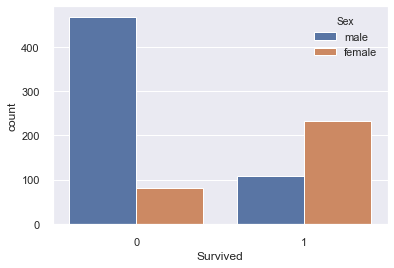

In [9]:
sns.countplot(x = 'Survived', data = train, hue = 'Sex')

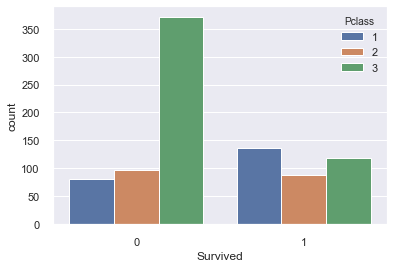

In [10]:
sns.countplot(x = 'Survived', data = train, hue = 'Pclass')

## 缺失数据处理

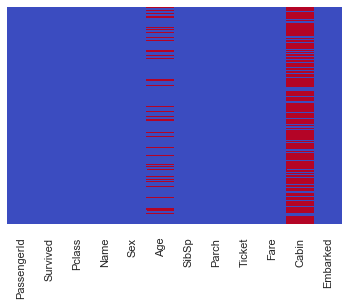

In [11]:
sns.heatmap(train.isnull(), yticklabels = False, cmap = 'coolwarm', cbar = False)

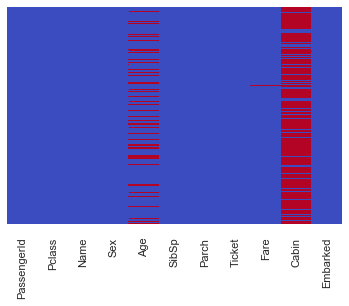

In [12]:
sns.heatmap(test.isnull(), yticklabels = False, cmap = 'coolwarm', cbar = False)

### Embark缺失的数据

In [13]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


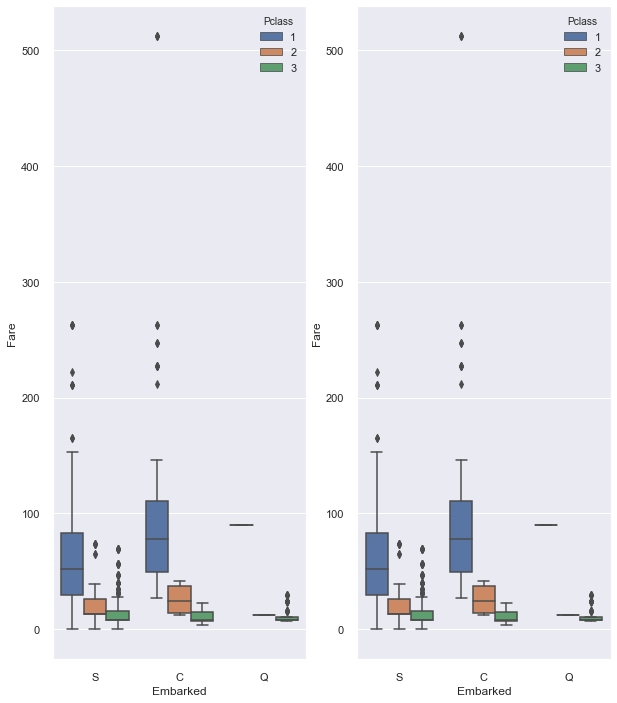

In [14]:
fig, ax = plt.subplots(figsize = (10, 12), ncols = 2)
ax1 = sns.boxplot(x = 'Embarked', y = 'Fare', hue = 'Pclass', data = train, ax = ax[0])
ax2 = sns.boxplot(x = 'Embarked', y = 'Fare', hue = 'Pclass', data = train, ax = ax[1])

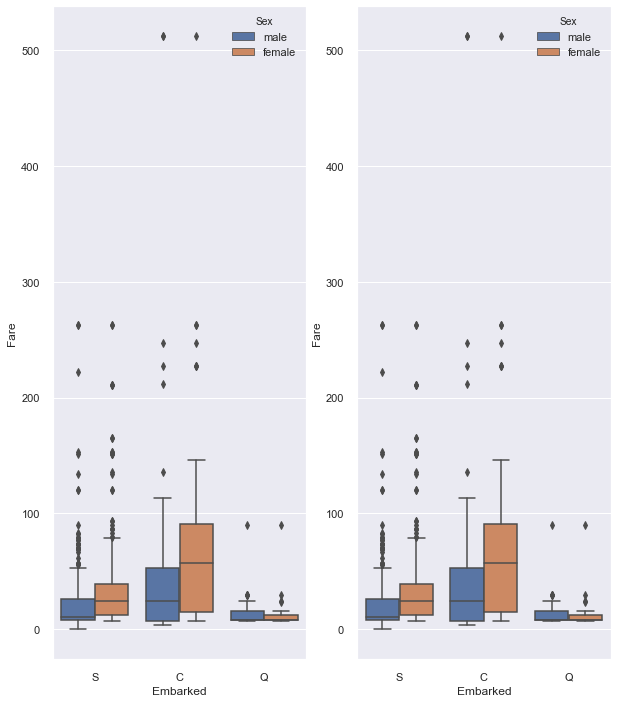

In [15]:
fig, ax = plt.subplots(figsize = (10, 12), ncols = 2)
ax1 = sns.boxplot(x = 'Embarked', y = 'Fare', hue = 'Sex', data = train, ax = ax[0])
ax2 = sns.boxplot(x = 'Embarked', y = 'Fare', hue = 'Sex', data = train, ax = ax[1])

In [16]:
train['Embarked'].fillna('C', inplace = True)

In [17]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Fare缺失的数据

In [18]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [19]:
missing_con = (test.Sex == 'male') & (test.Pclass == 3) & (test.Embarked == 'S')

In [20]:
far_mean = test[missing_con].Fare.mean()

In [21]:
test['Fare'].fillna('12', inplace = True)

In [22]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Age缺失的数据

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
train['Sex'] = train['Sex'].map({'male' : 1, 'female' : 0}).astype(int)
test['Sex'] = test['Sex'].map({'male' : 1, 'female' : 0}).astype(int)

In [25]:
train['Embarked'] = train['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)

In [26]:
train = train.drop('Cabin', axis = 1)

In [27]:
train_fe = train

In [28]:
test = test.drop('Cabin', axis = 1)

In [29]:
train_fe = test

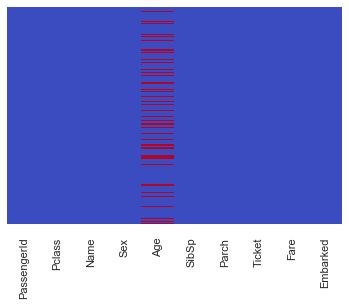

In [30]:
sns.heatmap(test.isnull(), yticklabels = False, cmap = 'coolwarm', cbar = False)

In [31]:
train = train.drop(['Ticket'], axis = 1)

In [32]:
test = test.drop(['Ticket'], axis = 1)

In [33]:
test.Fare = test.Fare.astype(int)

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int32
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int32
Embarked       418 non-null object
dtypes: float64(1), int32(2), int64(4), object(2)
memory usage: 26.2+ KB


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int32
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null int32
dtypes: float64(2), int32(2), int64(5), object(1)
memory usage: 62.8+ KB


## 生成新变量

In [37]:
train['Family_size'] = train['SibSp'] + train.Parch + 1
test['Family_size'] = test['SibSp'] + test.Parch + 1

In [38]:
def family_group(size):
    a = ''
    if size <= 1:
        a = '0'
    elif size <= 4:
        a = '1'
    else:
        a = '2'
    return a

In [40]:
train['Famliy_group'] = train['Family_size'].map(family_group).astype(int)
test['Family_group'] = test['Family_size'].map(family_group).astype(int)

In [42]:
train['Caculated_fare'] = train.Fare / train.Family_size
test['Caculated_fare'] = test.Fare / test.Family_size

In [43]:
def fare_group(fare):
    a = ''
    if fare <= 7.35:
        a = '0'
    elif fare <= 7.8:
        a = '1'
    elif fare <= 15:
        a = '2'
    elif fare <= 24:
        a = '3'
    else:
        a = '4'
    return a

In [44]:
train['Fare_group'] = train['Caculated_fare'].map(fare_group).astype(int)
test['Fare_group'] = test['Caculated_fare'].map(fare_group).astype(int)